<a href="https://colab.research.google.com/github/Hemanthghs/Cotton-Leaf-Disease-Detection-using-Deep-Learning/blob/main/Cotton_Leaf_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Cotton Leaf Disease Detection</h1>
<br>
<h1>Abstract</h1>
<p>According to the United Nations Food and Agriculture Organization, more than 45% of the world's population depends on agriculture for survival. Agriculture is the single largest employer in the world. Agriculture is the major source of raw materials for many industries starting from food to textile industries.</p>
<p>When it comes to textile industries, they are largely dependent on cotton production.
Growing the cotton crop requires continuous monitoring to identify the diseased plants in the field and then take the necessary measures. If the crop is not monitored regularly, the disease can spread across the entire crop which ultimately decreases cotton production.</p>
<p>Monitoring large cotton fields manually is a difficult and time-consuming task. Emerging technologies like Artificial Intelligence, Drones, and IoT can help in this task. Drones that are enabled with high-resolution cameras and integrated with Deep Learning, Computer Vision software can help monitoring the entire cotton field and identify the diseased regions of the crop in less time. This can help the farmers in taking immediate action and reduces the manual task of monitoring leading to better production.</p>


<h2>About the Project</h2>
<p>This project is about developing a Deep Learning model using Convolutional Neural Networks which can detect the diseased cotton leaf i.e., to classify whether a given cotton leaf is fresh or diseased.
 This is a binary classification task as there are 2 different classes.</p>

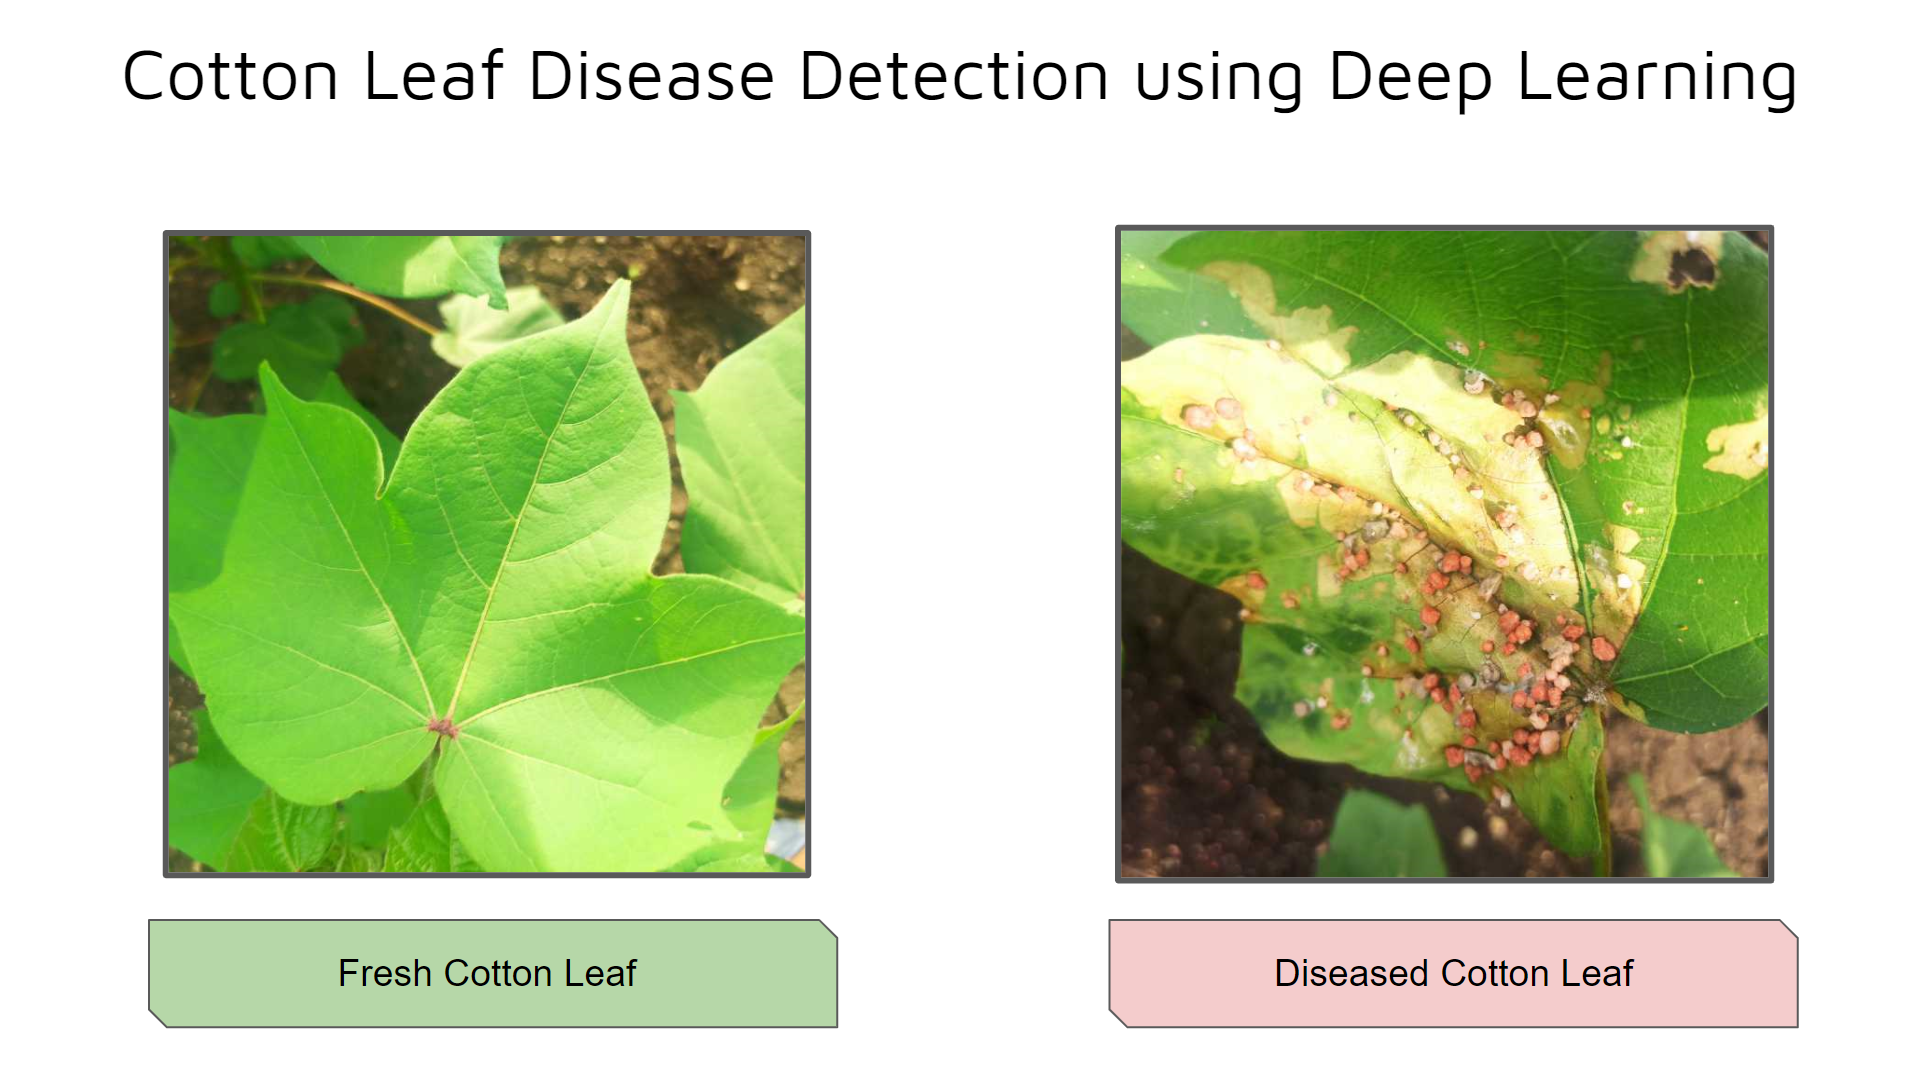

<h1><b>Dataset</b></h1>

<b>Parent Dataset Link : </b> [Click Here](https://www.kaggle.com/janmejaybhoi/cotton-disease-dataset)



<b>Dataset used for this project : </b> [Click Here](https://drive.google.com/drive/folders/1He8eQ3raIGrbVvNwhhNK5ELFnoiE3dQk?usp=sharing)

------------------------

<h3>Dataset Description:</h3>

Dataset consist of color images of fresh and diseased cotton leaves.

||<h4>Training Data</h4>|<h4>Validation Data</h4>|
|------|------|------|
|<h5>No. of Fresh Cotton Leaf Images</h5>|<h6><b>427</b></h6>|<h6><b>80</b> </h6>    |
|<h5>No. of Diseased Cotton Leaf Images</h5>|<h6><b>288</b></h6>|<h6><b>55</b><h6>|
|<h5>Total No. of Images</h5>|<h6><b>715</b></h6>|<h6><b>135</b></h6>|



<h3>Libraries Required</h3>


*   Keras (Interface for Tensorflow Library)
*   Matplotlib (For plotting images and graphs)
*   Numpy (For dealing with multi-dimentional arrays)
*   OpenCV (For dealing with images)


<h2>Importing the libraries</h2>

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array

<h2>Creating the data generator</h2>

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

<h2>Training dataset path in google drive</h2>

In [ ]:
train_images = "/content/drive/MyDrive/Cotton Leaf Disease Prediction Dataset/train_leaf"

<h2>Loading the training images</h2>

Resizing the images to 150x150 with 3 channels (RGB)

In [ ]:
training_data = training_datagen.flow_from_directory(train_images, target_size=(150, 150), class_mode='binary') 

Found 715 images belonging to 2 classes.


<h3>Output classes</h3>

>  <h4>diseased cotton leaf : 0</h4>

>  <h4>fresh cotton leaf : 1</h4>

In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0, 'fresh cotton leaf': 1}

In [ ]:
training_data.color_mode

'rgb'

<h3>Plotting diseased leaf images from training data</h3>

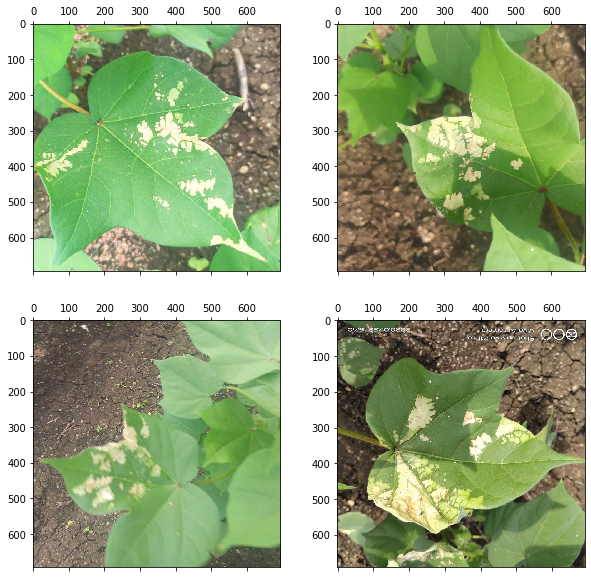

In [ ]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(2,2,1)
plot2 = plot_image.add_subplot(2,2,2)
plot3 = plot_image.add_subplot(2,2,3)
plot4 = plot_image.add_subplot(2,2,4)

plot1.matshow(plt.imread(training_data.filepaths[20]))
plot2.matshow(plt.imread(training_data.filepaths[128]))
plot3.matshow(plt.imread(training_data.filepaths[287]))
plot4.matshow(plt.imread(training_data.filepaths[189]))

<h3>Plotting the fresh leaf images from the dataset</h3>

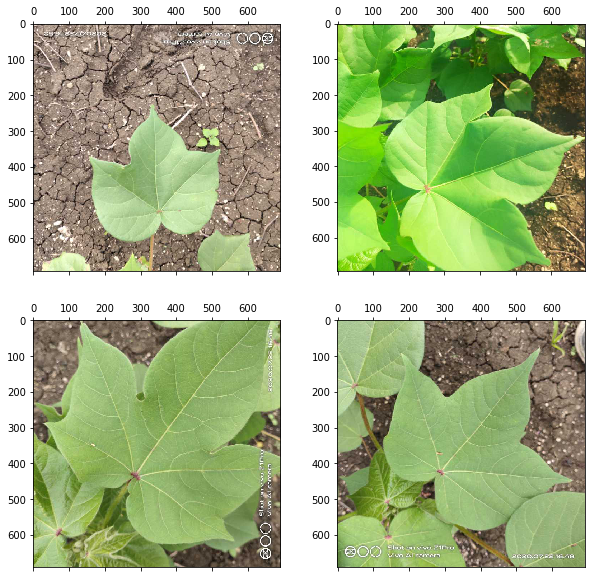

In [ ]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(2,2,1)
plot2 = plot_image.add_subplot(2,2,2)
plot3 = plot_image.add_subplot(2,2,3)
plot4 = plot_image.add_subplot(2,2,4)

plot1.matshow(plt.imread(training_data.filepaths[300]))
plot2.matshow(plt.imread(training_data.filepaths[450]))
plot3.matshow(plt.imread(training_data.filepaths[565]))
plot4.matshow(plt.imread(training_data.filepaths[676]))

<h2>Loading Validation Data</h2>

In [ ]:
testing_images = '/content/drive/MyDrive/Cotton Leaf Disease Prediction Dataset/test_leaf'

In [ ]:
testing_datagen = ImageDataGenerator(rescale=1./255)

testing_data = testing_datagen.flow_from_directory(testing_images, target_size=(150, 150), class_mode='binary') 

Found 135 images belonging to 2 classes.


<h1><b>Neural Network Architecture</b></h1>



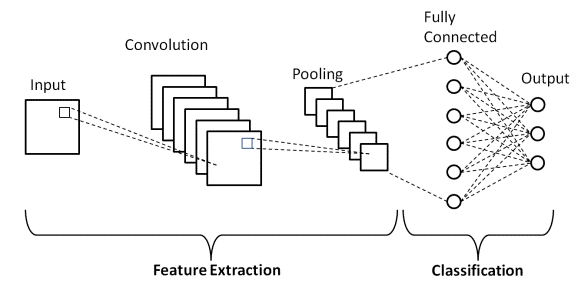

>   <h3>Convolution Layers and Pooling Layers are used for feature extraction</h3>

>   <h3>ANN layers are used for classification</h3>



---





Four conv2D layers each followed by a maxpooling2D layer

followed by

ANN with 2 hidden layers and 1 output layer



---


Output layer consist of single neuron

<h4><B>Activation Functions Used</B></h4>

* ReLU (Rectified Linear Unit) - Used in the hidden layers

* Sigmoid - Used in the output layer as this is binary classification

---

<h4><b>Loss Function</b></h4>

*   <h4>Binary Cross Entropy</h4>



---

<h4><b>Optimizer</b></h4>

*   <h4>Adam Optimizer with learning rate = 0.0001</h4> 

---

<h4>Dropout Layers are added in between to prevent overfitting</h4>

---


<h2>Defining neural network using Keras</h2>




In [ ]:
model = keras.models.Sequential([
          #input layer takes 150x150x3 image 
          #Convolution and Maxpooling layers for feature extraction
          keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=[150, 150, 3]),
          keras.layers.MaxPooling2D(pool_size=(2,2)),
          keras.layers.Conv2D(filters=64,activation='relu', kernel_size=3),
          keras.layers.MaxPooling2D(pool_size=(2,2)),
          keras.layers.Conv2D(filters=128,activation='relu', kernel_size=3),
          keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
          keras.layers.Conv2D(filters=256,activation='relu', kernel_size=3),
          keras.layers.MaxPooling2D(pool_size=(2,2)),
          keras.layers.Dropout(0.5),

          #ANN layers for classification
          keras.layers.Flatten(), 
          keras.layers.Dense(units=128, activation='relu'), 
          keras.layers.Dropout(0.1),                                    
          keras.layers.Dense(units=256, activation='relu'),                                    
          keras.layers.Dropout(0.25),                                    
          keras.layers.Dense(units=1, activation='sigmoid') 
])

Compiling the model

In [ ]:
model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

<h2>Training the model for 100 epochs</h2>

In [ ]:
history = model.fit(training_data, epochs=100, validation_data = testing_data)

Epoch 1/100
23/23 [==============================] - 264s 10s/step - loss: 0.6857 - accuracy: 0.5598 - val_loss: 0.6699 - val_accuracy: 0.5926
Epoch 2/100
23/23 [==============================] - 9s 403ms/step - loss: 0.6733 - accuracy: 0.6083 - val_loss: 0.6608 - val_accuracy: 0.5926
Epoch 3/100
23/23 [==============================] - 9s 408ms/step - loss: 0.6708 - accuracy: 0.5818 - val_loss: 0.6191 - val_accuracy: 0.6000
Epoch 4/100
23/23 [==============================] - 9s 399ms/step - loss: 0.6447 - accuracy: 0.6356 - val_loss: 0.5684 - val_accuracy: 0.7333
Epoch 5/100
23/23 [==============================] - 9s 398ms/step - loss: 0.5904 - accuracy: 0.7101 - val_loss: 0.4443 - val_accuracy: 0.8444
Epoch 6/100
23/23 [==============================] - 10s 416ms/step - loss: 0.4928 - accuracy: 0.7903 - val_loss: 0.3580 - val_accuracy: 0.8667
Epoch 7/100
23/23 [==============================] - 9s 409ms/step - loss: 0.4460 - accuracy: 0.8171 - val_loss: 0.3966 - val_accuracy: 0.844

<h2>Plotting Loss Vs. No. of Epochs</h2>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

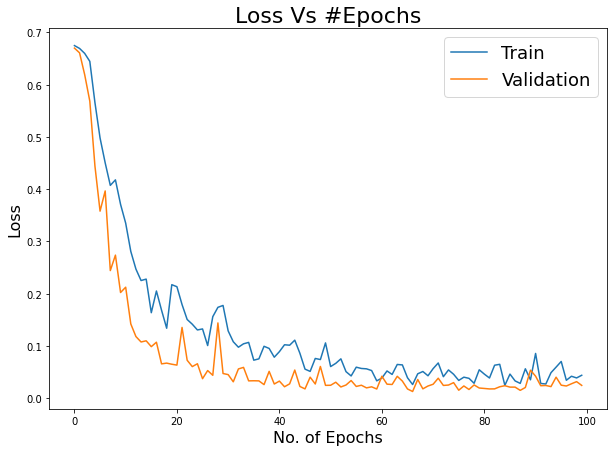

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Train',"Validation"], fontsize=18)
plt.title("Loss Vs #Epochs", fontsize=22)
plt.xlabel("No. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.show()

<h2>Plotting Accuracy Vs. No. of Epochs</h2>

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

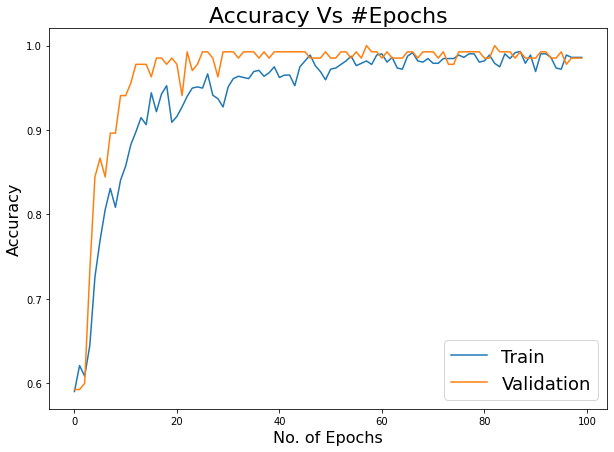

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['Train',"Validation"], fontsize=18)
plt.title("Accuracy Vs #Epochs", fontsize=22)
plt.xlabel("No. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show()

<h3>Saving the trained model which can be used directly for deployment</h3>

In [ ]:
model.save("model.h5")

<h3>Function for predicting the class Fresh Leaf/Diseased Leaf based on model output

If model output >= 0.5 : Prediction = 1 means Fresh Cotton Leaf

If model output <  0.5  : Prediction = 0 means Diseased Cotton Leaf



In [ ]:
def predict_class(filepath):
  img = plt.imread(filepath)
  temp_img = img
  img = cv2.resize(img,(150,150))
  img = img_to_array(img)/255
  img = np.expand_dims(img,axis=0)
  prediction = model.predict(img) >= 0.5
  if prediction==1:
    prediction = "Fresh Cotton Leaf"
  else:
    prediction = "Diseased Cotton Leaf"
  print("Prediction: "+prediction)
  plt.imshow(temp_img)
  plt.title("Prediction: "+prediction, fontsize=18)

Prediction: Fresh Cotton Leaf


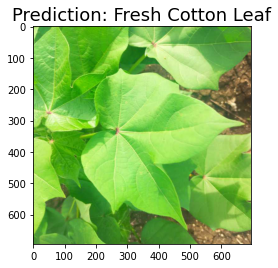

In [ ]:
predict_class('/content/drive/MyDrive/Cotton Leaf Disease Prediction Dataset/test_leaf/fresh cotton leaf/d (291)_iaip.jpg')

Prediction: Fresh Cotton Leaf


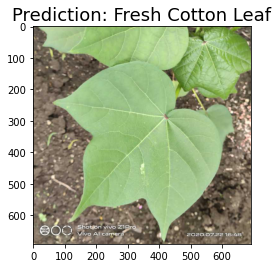

In [ ]:
predict_class('/content/drive/MyDrive/Cotton Leaf Disease Prediction Dataset/test_leaf/fresh cotton leaf/d (24)_iaip.jpg')

Prediction: Diseased Cotton Leaf


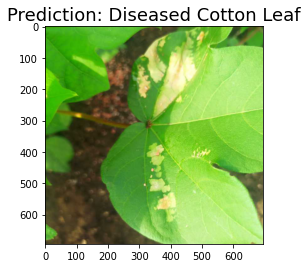

In [ ]:
predict_class( '/content/drive/MyDrive/Cotton Leaf Disease Prediction Dataset/test_leaf/diseased cotton leaf/dis_leaf (153)_iaip.jpg')

Prediction: Diseased Cotton Leaf


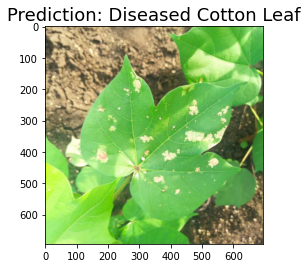

In [ ]:
predict_class('/content/drive/MyDrive/Cotton Leaf Disease Prediction Dataset/test_leaf/diseased cotton leaf/dis_leaf (296)_iaip.jpg')

<h1>Conclusion</h1>

Training accuracy after 100 epochs : <b>98.46</b>

Validation accuract after 100 epochs : <b>98.52</b>

The trained model can be embedded into the IoT devices like Arduino and RaspberryPi which can be integrated with drones and can be deployed into the fields.